# Hotel booking demand

Dataset ini berasal dari paper Jurnal Ilmiah berjudul "Hotel booking demand datasets" yang ditulis oleh Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. Penjelasan tiap feature/variabel dari Jurnal bisa Anda akses di https://www.sciencedirect.com/science/article/pii/S2352340918315191

### Data Detail

1. Hotel = Hotel (H1 = Resort Hotel or H2 = City Hotel)
2. is_canceled = Value indicating if the booking was canceled (1) or not (0)
3. lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. arrival_date_year = Year of arrival date
5. arrival_date_month = Month of arrival date
6. arrival_date_week_number = Week number of year for arrival date
7. arrival_date_day_of_month = Day of arrival date
8. stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# membaca dataset 
bookData = pd.read_csv("hotel_bookings.csv")
bookData = bookData.iloc[0:3000] #membaca 3000 data 
# menampilkan sample data
bookData.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
len(bookData['hotel'])

3000

In [4]:
bookData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 32 columns):
hotel                             3000 non-null object
is_canceled                       3000 non-null int64
lead_time                         3000 non-null int64
arrival_date_year                 3000 non-null int64
arrival_date_month                3000 non-null object
arrival_date_week_number          3000 non-null int64
arrival_date_day_of_month         3000 non-null int64
stays_in_weekend_nights           3000 non-null int64
stays_in_week_nights              3000 non-null int64
adults                            3000 non-null int64
children                          3000 non-null float64
babies                            3000 non-null int64
meal                              3000 non-null object
country                           2999 non-null object
market_segment                    3000 non-null object
distribution_channel              3000 non-null object
is_repeated_guest    

- Setelah diperhatikan type data nya, semua Feature tidak ada yang salah dengan Type datanya.
- Jika diperhatikan jumlah datanya, dapat disimulkan bahwa ada Null Value di feature 'Country','Agent', dan 'Company'.

# Data Cleaning & Preprocessing

### Handling Null values

In [6]:
bookData.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2877
days_in_waiting_list     

- Dapat dilihat dari data diatas ada 3 feature yang memiliki Null Value, dan Feature Company memiliki sangat banyak Null Value

In [7]:
#country NullVall

bookData['country'].describe()

count     2999
unique      53
top        PRT
freq      1775
Name: country, dtype: object

In [8]:
bookData[bookData['country'] == 'PRT']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2998,Resort Hotel,0,0,2015,November,46,11,0,1,2,...,No Deposit,NaN,NaN,0,Transient,79.0,1,0,Check-Out,2015-11-12


- Feature Country pada dataset ini menggunakan format dari ISO 3155–3:2013 

- dapat dilihat pada link berikut:
<br>
https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
<br>

Untuk megisi 1 Null Value pada Feature country saya memutuskan untuk menggunakan top data dari country yaitu PRT yang adalah 'The Portuguese Republic'






In [9]:
bookData.country.value_counts()

PRT    1775
ESP     343
GBR     316
IRL     143
FRA      79
DEU      38
NLD      35
CN       28
USA      27
BEL      22
CHE      22
POL      19
RUS      18
ITA      15
BRA      13
ROU      12
AUT      10
FIN       8
SWE       7
LVA       6
DNK       5
LUX       4
NOR       4
ARG       4
IND       3
CHN       3
AUS       3
CHL       2
MEX       2
OMN       2
DZA       2
TUR       2
CZE       2
MAR       2
SVN       2
EST       2
MOZ       2
LTU       2
UKR       1
CPV       1
SMR       1
ZWE       1
ISR       1
ALB       1
SRB       1
BLR       1
PRI       1
ZMB       1
BWA       1
CYM       1
ZAF       1
GRC       1
AGO       1
Name: country, dtype: int64

In [10]:
bookData['country'] = bookData['country'].fillna('Male')
bookData.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2877
days_in_waiting_list     

In [11]:
#agent NullVall
bookData['agent'].describe()

count    2535.000000
mean      209.945562
std        70.305031
min         2.000000
25%       202.000000
50%       240.000000
75%       241.000000
max       334.000000
Name: agent, dtype: float64

Feature agent pada dataset berikut merupakan ID dari travel agency yang memesan.
<br>

Untuk megisi Null Value pada Feature agent saya memutuskan untuk menggunakan median data dari agent yaitu 240.

In [13]:
bookData['agent'] = bookData['agent'].fillna(240)
bookData.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                                0
company                           2877
days_in_waiting_list     

In [14]:
#company NullVall

bookData['company'].describe()

count    123.000000
mean     221.178862
std       83.433790
min       12.000000
25%      115.500000
50%      270.000000
75%      281.000000
max      318.000000
Name: company, dtype: float64

Feature Company merupakan ID dari company/entity yang melakukan pemesanan atau yang betanggung jawab untuk membayar pemesanan.

In [16]:
bookData[bookData['company'].isna() == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,240.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2997,Resort Hotel,0,36,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,73.2,1,0,Check-Out,2015-11-15
2998,Resort Hotel,0,0,2015,November,46,11,0,1,2,...,No Deposit,240.0,NaN,0,Transient,79.0,1,0,Check-Out,2015-11-12


- menimbang dataset berikut merupakan data booking yang transaksinya sudah selesai, saya berasumsi akan tidak masalah untuk mengisi null value pada feature company denga median dari feature company. Tetu hal ini tidak akan dilakukan jika transaksi belum selesai karena akan merugikanperusahaan yang bersangkutan.

In [17]:
bookData['company'] = bookData['company'].fillna(270)
bookData.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# EDA

## Descriptive analytics

In [18]:
bookData.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.354333,63.740667,2015.0,35.939000,15.072333,1.316000,3.496000,2.033000,0.139000,0.019667,0.0,0.0,0.0,0.210333,214.604000,267.998333,0.345667,105.005467,0.132000,0.728000
std,0.478391,61.241921,0.0,5.616327,9.113952,1.150037,2.394555,1.992796,0.493045,0.141256,0.0,0.0,0.0,0.641532,65.534368,19.414719,4.022716,54.367602,0.340511,0.868102
min,0.000000,0.000000,2015.0,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2015.0,31.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,270.000000,0.000000,61.350000,0.000000,0.000000
50%,0.000000,52.000000,2015.0,36.000000,14.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,270.000000,0.000000,100.680000,0.000000,0.000000
75%,1.000000,90.000000,2015.0,41.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,270.000000,0.000000,138.850000,0.000000,1.000000
max,1.000000,737.000000,2015.0,46.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,334.000000,318.000000,50.000000,299.330000,2.000000,4.000000


In [21]:
bookData.is_canceled.value_counts()

0    1937
1    1063
Name: is_canceled, dtype: int64

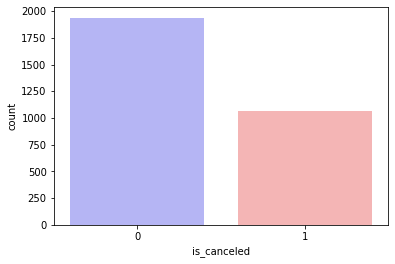

In [26]:
sns.countplot(x="is_canceled", data=bookData, palette="bwr")
plt.show()

- Dari Visualisasi diatas dapat kita lihat memang lebih banyak yang tidak membatalkan pesanan (0) dari pada yang membatalkan pesanan (1).
- namun jumlah yang membatalkan pesanan bisa dikatakan cukup banyak karena jumlahnya lebih dari 50% jumlah yang tidak membatalkan pesanan (0)

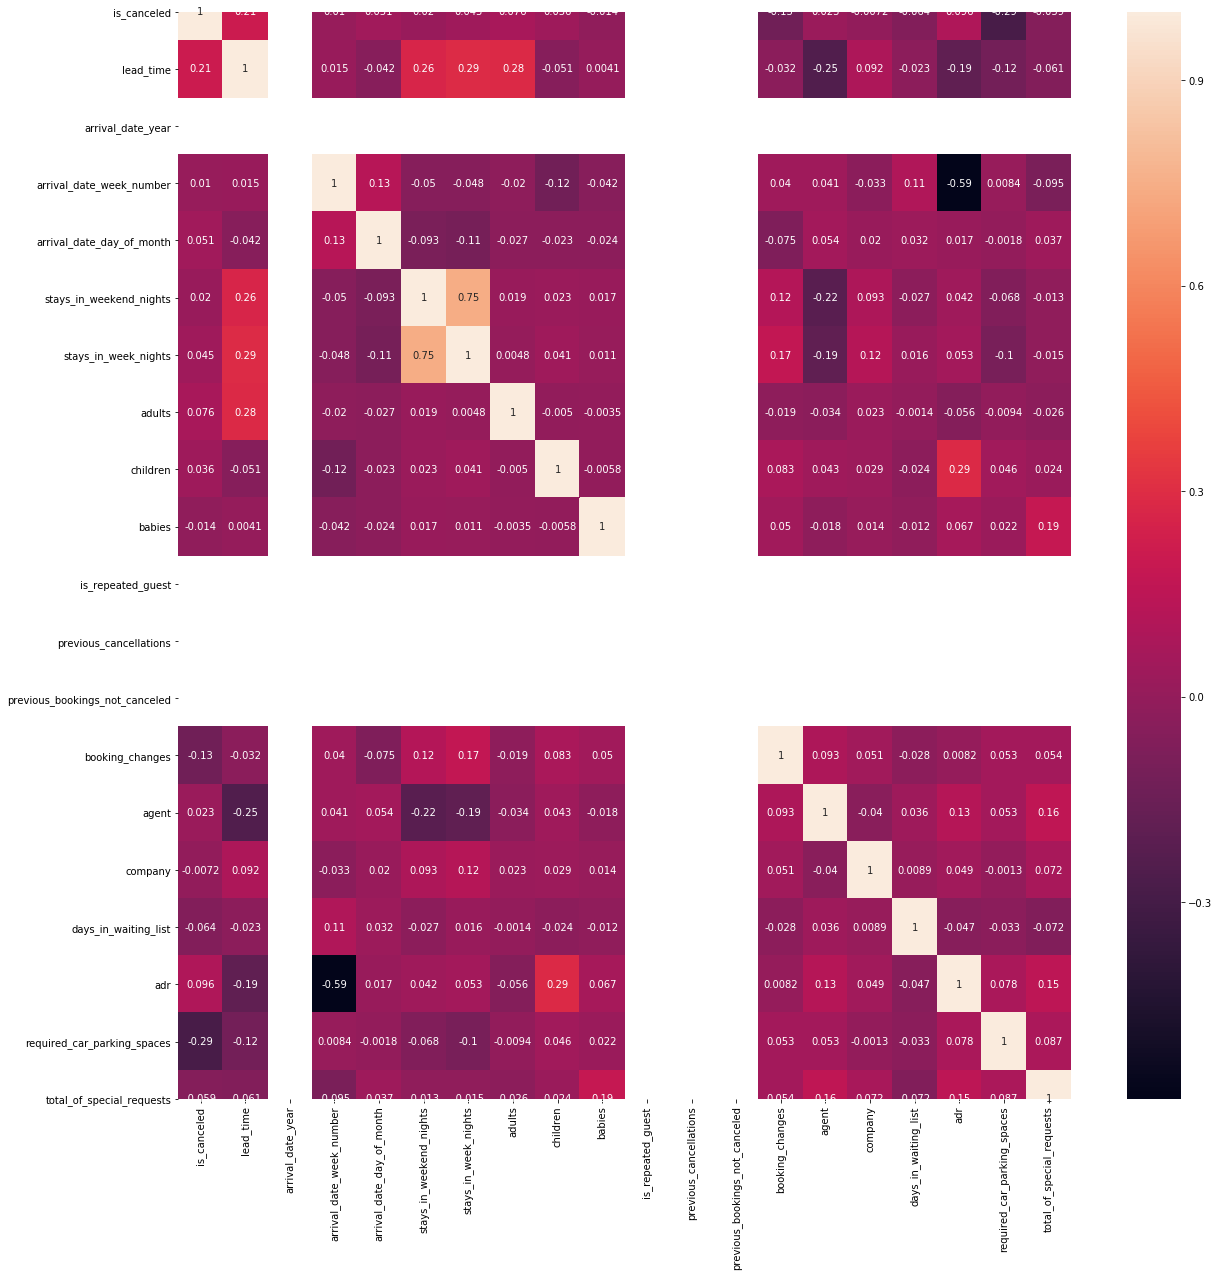

In [42]:
#Melihat Corelasi secara keseluruhan
plt.figure(figsize = (20,20))
sns.heatmap(bookData.corr(), annot = True)

- Dari Visualisasi diatas dapat saya asumsikan bahwa kebanyakan data tidak memiliki hubungan yang erat secara langsung. Hanya **stays_in_weekend_nights** dan **stays_in_week_nights** yang bisa dikatakan cukup erat hubungannya.

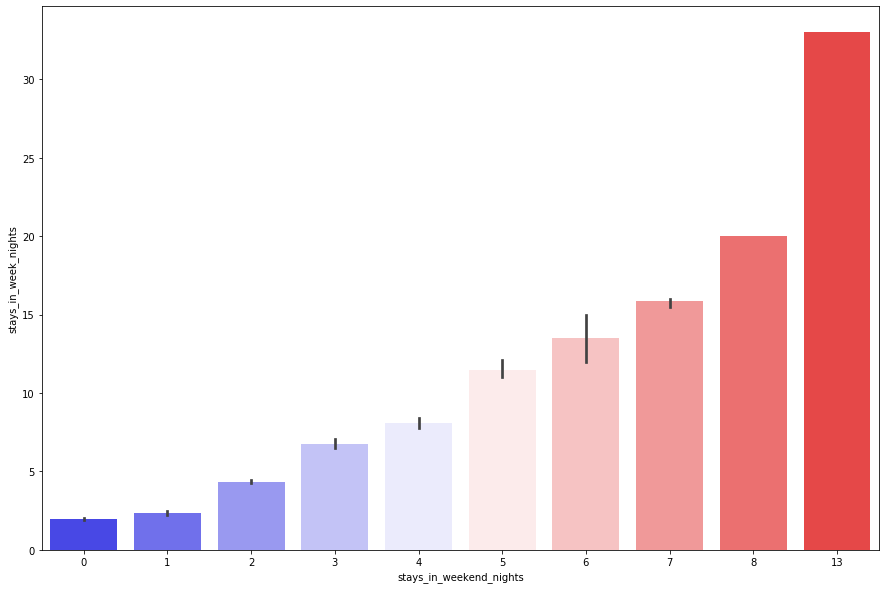

In [46]:
plt.figure(figsize = (15,10))
sns.barplot(x="stays_in_weekend_nights", y='stays_in_week_nights', data=bookData, palette="bwr")
plt.show()

- terlihat dari visualisasi diatas ternyata memang jumlah nya saling berkaitan, karena memang jika seseorang menginap 7 hari sudah pasti jumlah weekend nya bertambah 2. 

In [55]:
bookData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,240.0,270.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,240.0,270.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,240.0,270.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,270.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,270.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Categorical Data Visualization

In [75]:
categorical= ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
              'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights', 'meal', 'country','market_segment',
             'distribution_channel', 'is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type',
             'agent', 'customer_type', 'reservation_status', 'reservation_status_date']
print(categorical)


['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'reservation_status', 'reservation_status_date']


IndexError: index 4 is out of bounds for axis 0 with size 4

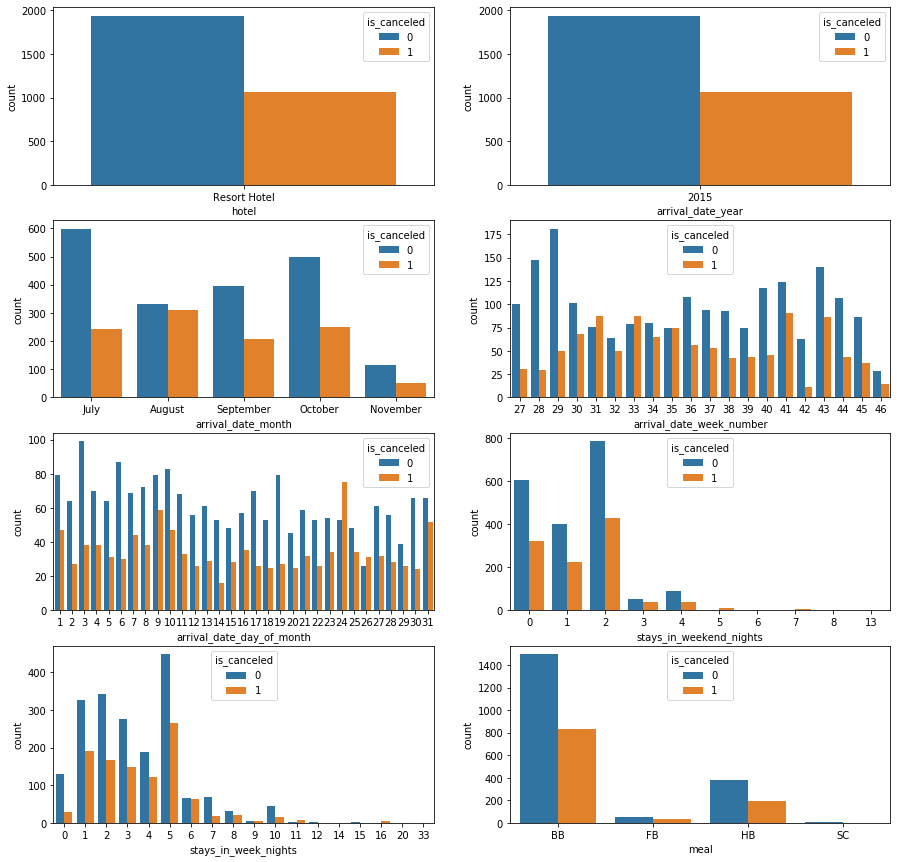

In [76]:
### Loan Data Visualization libraries

fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=bookData,hue='is_canceled',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

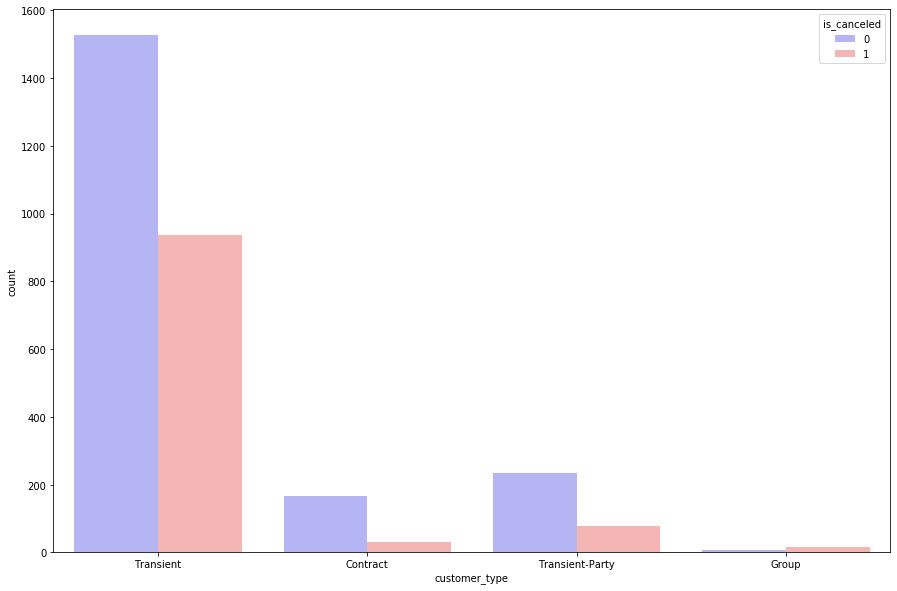

In [86]:
plt.figure(figsize = (15,10))
sns.countplot(x="customer_type", data=bookData, hue='is_canceled', palette="bwr")
plt.show()

- Saya menemukan hal menarik dimana customer_type = Transient adalah yang paling banyak melakukan pesanan.

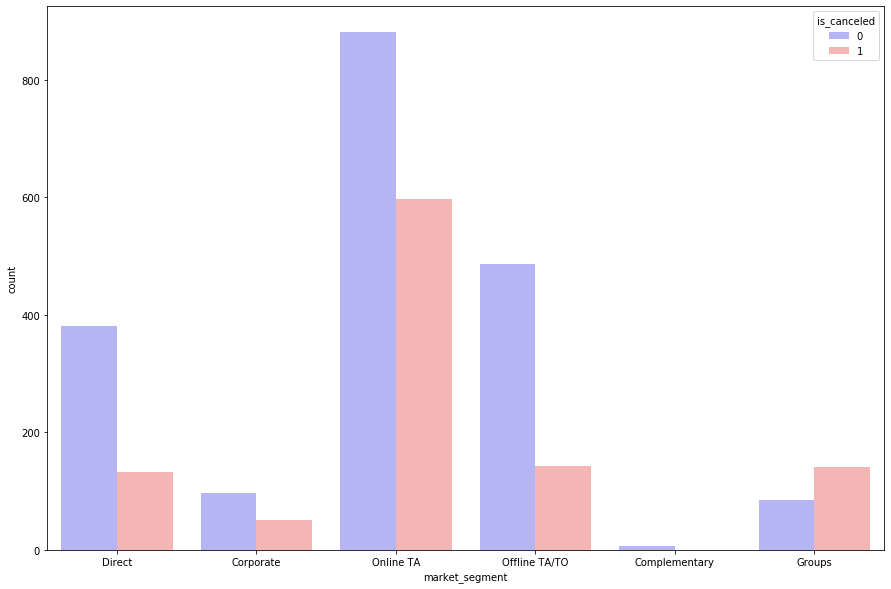

In [87]:
plt.figure(figsize = (15,10))
sns.countplot(x="market_segment", data=bookData, hue='is_canceled', palette="bwr")
plt.show()

- Saya menemukan hal menarik dimana market_segment = Online TA adalah yang paling banyak melakukan pesanan

# Model Building & Hyper-parameter Tuning

In [90]:
#### Encoding categrical Features: ##########
bookData_dummies = pd.get_dummies(bookData,drop_first=True)
bookData_dummies.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2015-11-08,reservation_status_date_2015-11-09,reservation_status_date_2015-11-10,reservation_status_date_2015-11-11,reservation_status_date_2015-11-12,reservation_status_date_2015-11-13,reservation_status_date_2015-11-14,reservation_status_date_2015-11-15,reservation_status_date_2015-11-16,reservation_status_date_2015-11-17
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Logistic Regression

### Spliting Dataset

In [91]:
x = bookData_dummies.drop(['is_canceled'], axis = 1)
y = bookData_dummies['is_canceled']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Fitting Model

In [93]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='newton-cg')
modelLR.fit(x_train, y_train)
print(modelLR.coef_)
print(modelLR.intercept_)

m = modelLR.coef_[0][0]
c = modelLR.intercept_[0]

[[ 4.63062081e-03  2.24120393e-04  4.80322025e-02  4.07954938e-03
   1.54712127e-03  5.70555690e-02  6.25569804e-02  2.21525882e-02
  -6.79992117e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.11087944e-01 -4.07702117e-04 -1.82975593e-03 -7.51429571e-02
   5.83093241e-03 -9.53707799e-01 -1.21632764e-01 -7.28664577e-02
  -2.46477092e-02 -1.99659016e-02  3.77495714e-02 -1.77056710e-02
  -1.90702191e-01 -1.92779401e-02 -2.19012920e-03 -3.46967789e-03
  -4.54293913e-03 -1.59245718e-02 -5.17945499e-02 -5.07741285e-03
  -1.78702977e-02  0.00000000e+00 -4.62763268e-02 -1.00452845e-02
  -8.50805677e-03  5.68980974e-02 -1.09667551e-03 -3.24791035e-03
  -1.78064664e-03 -1.87998180e-02 -1.10579813e-02 -3.85386139e-03
  -8.80321594e-02 -4.75326073e-03 -1.57469482e-02 -1.41965044e-01
  -5.50181109e-01 -2.49667968e-03 -7.38735064e-03 -2.12520892e-01
  -1.94689800e-03 -3.07317278e-02 -1.50739710e-02 -1.05130779e-02
  -1.83003486e-02 -1.21438348e-03 -7.71840662e-03 -1.19920490e-03
   0.00000

In [94]:
y_pred = modelLR.predict(x_test) 

In [95]:
# trying to predict using model
coba = x_test.iloc[:1]
modelLR.predict(coba)
# coba

array([0])

In [101]:
modelLR.score(x_test, y_test)

1.0

## Hyperparameter Tuning

In [102]:
# Parameter yang dipakai di model asli
modelLR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [103]:
# parameter model linear regression yang akan dituned + nilai yang mungkin

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [104]:
# mencari parameter terbaik pada model: logistic regression

from sklearn.model_selection import RandomizedSearchCV
model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param, cv = 5
)

# model_LR2_GS = GridSearchCV( model_LR2, param, cv=5, error_score=0.0)

In [105]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklear

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000}

In [106]:
modelLR.score(x_test, y_test)

1.0

- Data Aslinya sangat overfiting

In [107]:
model_LogReg_Baru = LogisticRegression(solver='saga', penalty = 'l2', max_iter = 10000)

model_LogReg_Baru.fit(x_train, y_train)
model_LogReg_Baru.score(x_test, y_test)

0.9433333333333334

- Data setelah di tuning

In [114]:
from sklearn.linear_model import LogisticRegression

model_LogReg_Baru = LogisticRegression(solver='newton-cg')
model_LogReg_Baru.fit(x_train, y_train)
print(model_LogReg_Baru.coef_)
print(model_LogReg_Baru.intercept_)

m = model_LogReg_Baru.coef_[0][0]
c = model_LogReg_Baru.intercept_[0]

[[ 4.63062081e-03  2.24120393e-04  4.80322025e-02  4.07954938e-03
   1.54712127e-03  5.70555690e-02  6.25569804e-02  2.21525882e-02
  -6.79992117e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.11087944e-01 -4.07702117e-04 -1.82975593e-03 -7.51429571e-02
   5.83093241e-03 -9.53707799e-01 -1.21632764e-01 -7.28664577e-02
  -2.46477092e-02 -1.99659016e-02  3.77495714e-02 -1.77056710e-02
  -1.90702191e-01 -1.92779401e-02 -2.19012920e-03 -3.46967789e-03
  -4.54293913e-03 -1.59245718e-02 -5.17945499e-02 -5.07741285e-03
  -1.78702977e-02  0.00000000e+00 -4.62763268e-02 -1.00452845e-02
  -8.50805677e-03  5.68980974e-02 -1.09667551e-03 -3.24791035e-03
  -1.78064664e-03 -1.87998180e-02 -1.10579813e-02 -3.85386139e-03
  -8.80321594e-02 -4.75326073e-03 -1.57469482e-02 -1.41965044e-01
  -5.50181109e-01 -2.49667968e-03 -7.38735064e-03 -2.12520892e-01
  -1.94689800e-03 -3.07317278e-02 -1.50739710e-02 -1.05130779e-02
  -1.83003486e-02 -1.21438348e-03 -7.71840662e-03 -1.19920490e-03
   0.00000

In [115]:
y_pred = model_LogReg_Baru.predict(x_test) 

In [116]:
# trying to predict using model
coba = x_test.iloc[:1]
model_LogReg_Baru.predict(coba)
# coba

array([0])

In [117]:
modelLR.score(x_test, y_test)

1.0

In [118]:
confusion_matrix(y_test, y_pred) 

array([[388,   0],
       [  0, 212]])

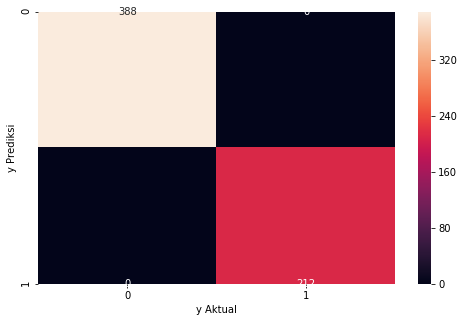

In [119]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [120]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       1.00      1.00      1.00       212

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [121]:
modelLR.score(x_test, y_test)

1.0

In [122]:
accuracies = {}
acc = modelLR.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Logistic Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

Logistic Regression Algorithm Accuracy Score : 100.00%


- Menggunakan model Logistic linear akurasinya 100%, saya meng asumsikan model ML yang saya buat tergolong overfitting.

Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:

1. Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.
2. Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).

-Dalam konteks bisnis perhotelan, apabila pengunjung diasumsikan tidak cancel booking maka pihak hotel akan menyiapkan beberapa hal untuk menyambut kedatangan mereka, di antaranya:

1. Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,
2. Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,
3. Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,
4. Menolak pengunjung lain yang memesan kamar yang telah dipesan (booked room), dan
5. Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan.

Pilih jenis kesalahan yang paling berpengaruh pada kerugian perusahaan dan jelaskan alasan pilihan Anda! Lalu, pilih dan jelaskan evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Jelaskan langkah Anda untuk meningkatkan performa model ML untuk bisa menekan jenis kesalahan tersebut!

### Kesalahan yang perlu di hindari adalah salah memprediksi user membatalkan pesanan. tentu hal tersebut akan merugikan kedua pihak, user yang sudah datang jauh-jauh dari tempat asal ternyata kamar yang ia book sudah digunakan user lain. 

### Kesalahan ini akan sayang fatal jika terjadi pada banyak user, tentu akan terjadi penumpukan custommer yang complain.